In [1]:
import pandas as pd


In [7]:
airports=pd.read_excel("codes.xlsx")
airports

0                                            1             2   \
0         1                               Goroka Airport        Goroka   
1         2                               Madang Airport        Madang   
2         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3         4                               Nadzab Airport        Nadzab   
4         5  Port Moresby Jacksons International Airport  Port Moresby   
...     ...                                          ...           ...   
7693  14106                          Rogachyovo Air Base        Belaya   
7694  14107                        Ulan-Ude East Airport      Ulan Ude   
7695  14108                         Krechevitsy Air Base      Novgorod   
7696  14109                  Desierto de Atacama Airport       Copiapo   
7697  14110                           Melitopol Air Base     Melitopol   

                    3    4     5          6           7     8   9   10  \
0     Papua New Guinea  GKA  AYGA  -6.081690  145.391998  5282  10   U   
1     Papua New Guinea  MAG  AYMD  -5.207080  145.789001    20  10   U   
2     Papua New Guinea  HGU  AYMH  -5.826790  144.296005  5388  10   U   
3     Papua New Guinea  LAE  AYNZ  -6.569803  146.725977   239  10   U   
4     Papua New Guinea  POM  AYPY  -9.443380  147.220001   146  10   U   
...                ...  ...   ...        ...         ...   ...  ..  ..   
7693            Russia   \N  ULDA  71.616699   52.478298   272  \N  \N   
7694            Russia   \N  XIUW  51.849998  107.737999  1670  \N  \N   
7695            Russia   \N  ULLK  58.625000   31.385000    85  \N  \N   
7696             Chile  CPO  SCAT -27.261200  -70.779198   670  \N  \N   
7697           Ukraine   \N  UKDM  46.880001   35.305000     0  \N  \N   

                        11       12           13  
0     Pacific/Port_Moresby  airport  OurAirports  
1     Pacific/Port_Moresby  airport  OurAirports  
2     Pacific/Port_Moresby  airport  OurAirports  
3     Pacific/Port_Moresby  airport  OurAirports  
4     Pacific/Port_Moresby  airport  OurAirports  
...                    ...      ...          ...  
7693                    \N  airport  OurAirports  
7694                    \N  airport  OurAirports  
7695                    \N  airport  OurAirports  
7696                    \N  airport  OurAirports  
7697                    \N  airport  OurAirports  

[7698 rows x 14 columns]

In [8]:
import pandas as pd
data=pd.read_csv("airline_edges.csv")
data.head()
a=set(list(data["Source"]))
b=set(list(data["Target"]))
c=a.union(b)
len(c)
airports_data=pd.DataFrame(c,columns=["IATA"])
airports_data

IATA
0     OAJ
1     EWK
2     SMV
3     IND
4     CDC
...   ...
1941  NGB
1942  BBX
1943  TYS
1944  WKR
1945  PSG

[1946 rows x 1 columns]

In [40]:
airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 
               'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
                        names = airport_col, index_col = 0)
new=airports_data.merge(airport_df,how="left", on="IATA")
new.dropna(how="any",inplace=True)
new[new["Lat"].isnull()]
new.head()

IATA                                Name             City        Country  \
0  OAJ              Albert J Ellis Airport  Jacksonville NC  United States   
1  EWK          Newton City-County Airport           Newton  United States   
2  SMV                     Samedan Airport          Samedan    Switzerland   
3  IND  Indianapolis International Airport     Indianapolis  United States   
4  CDC         Cedar City Regional Airport       Cedar City  United States   

   ICAO        Lat        Long     Alt Timezone DST Tz database time zone  \
0  KOAJ  34.829201  -77.612099    94.0       -5   A      America/New_York   
1  KEWK  38.058201  -97.274498  1533.0       -6   A       America/Chicago   
2  LSZS  46.534100    9.884110  5600.0        1   E         Europe/Zurich   
3  KIND  39.717300  -86.294403   797.0       -5   A      America/New_York   
4  KCDC  37.701000 -113.098999  5622.0       -7   A        America/Denver   

      type       source  
0  airport  OurAirports  
1  airport  OurAirports  
2  airport  OurAirports  
3  airport  OurAirports  
4  airport  OurAirports

In [53]:
airports=airports[[1,4,6,7]]
airports.dropna(how="any")
airports[airports[4]=='LCR']

Empty DataFrame
Columns: [1, 4, 6, 7]
Index: []

In [10]:
routes=pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",header=None)
routes

0      1    2     3    4     5    6  7    8
0      2B    410  AER  2965  KZN  2990  NaN  0  CR2
1      2B    410  ASF  2966  KZN  2990  NaN  0  CR2
2      2B    410  ASF  2966  MRV  2962  NaN  0  CR2
3      2B    410  CEK  2968  KZN  2990  NaN  0  CR2
4      2B    410  CEK  2968  OVB  4078  NaN  0  CR2
...    ..    ...  ...   ...  ...   ...  ... ..  ...
67658  ZL   4178  WYA  6334  ADL  3341  NaN  0  SF3
67659  ZM  19016  DME  4029  FRU  2912  NaN  0  734
67660  ZM  19016  FRU  2912  DME  4029  NaN  0  734
67661  ZM  19016  FRU  2912  OSS  2913  NaN  0  734
67662  ZM  19016  OSS  2913  FRU  2912  NaN  0  734

[67663 rows x 9 columns]

In [51]:
routes=routes[[2,4]]
routes["conn"]=1
routes[(routes[2]=="ABE") & (routes[4]=="ATL")]
routes_us = routes.groupby([2,4]).size().reset_index(name='counts')
routes_us.dropna(how="any")
routes_us[routes_us[2]=="LCR"]

2    4  counts
19116  LCR  ACR       1
19117  LCR  LET       1

In [92]:
routes_data=pd.read_csv("airline_edges.csv")
routes_data.head()

UNIQUE_CARRIER_NAME  ORIGIN_AIRPORT_ID Source  DEST_AIRPORT_ID Target  \
0  Empire Airlines Inc.              10140    ABQ            11413    DRO   
1  Empire Airlines Inc.              10140    ABQ            11711    FMN   
2  Empire Airlines Inc.              10194    AFW            12278    ICT   
3  Empire Airlines Inc.              10194    AFW            12896    LBB   
4  Empire Airlines Inc.              10194    AFW            13158    MAF   

   MONTH  
0      3  
1      3  
2      3  
3      3  
4      3

In [12]:
# airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 
#                'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
# airport_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
#                         names = airport_col, index_col = 0)
# # download flight routes data
# route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
#               'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
# routes_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",
#                         names = route_cols)
#clean up data, change 'object' type to numeric and drops NaNs
routes_data['Source'] = pd.to_numeric(routes_data['Source'].astype(str), 'coerce')
routes_data['Target'] = pd.to_numeric(routes_data['Target'].astype(str), 'coerce')
routes_data = routes_data.dropna(subset=["Source", "Target"])

In [45]:
airport_data.head()

Name        Lat        Long IATA  ICAO  \
0              Albert J Ellis Airport  34.829201  -77.612099  OAJ  KOAJ   
1          Newton City-County Airport  38.058201  -97.274498  EWK  KEWK   
3  Indianapolis International Airport  39.717300  -86.294403  IND  KIND   
4         Cedar City Regional Airport  37.701000 -113.098999  CDC  KCDC   
6                 Chenega Bay Airport  60.077301 -147.992004  NCN  PFCB   

              City  
0  Jacksonville NC  
1           Newton  
3     Indianapolis  
4       Cedar City  
6          Chenega

In [93]:
routes_data=routes_data[['Source','Target']]
routes_data['num']=1
routes_data

Source Target  num
0         ABQ    DRO    1
1         ABQ    FMN    1
2         AFW    ICT    1
3         AFW    LBB    1
4         AFW    MAF    1
...       ...    ...  ...
263841    ANC    SEA    1
263842    SEA    ANC    1
263843    ANC    SEA    1
263844    MCO    ATL    1
263845    SEA    ANC    1

[263846 rows x 3 columns]

In [94]:
# # routes_data['Source'].append(routes_data.loc[routes_data['Source'] != routes_data['Target'], 'Target']).value_counts()
# # routes_data.loc[routes_data['Source'] != routes_data['Target'], 'Target']

# # routes_data["Source"].value_counts()
# counts=list(routes_data["Source"])
# counts.extend(list(routes_data["Target"]))
# counts=pd.DataFrame(counts,columns=["IATA"])
# counts=counts["IATA"].value_counts()
# counts

In [96]:
x=list(airport_data["IATA"])
routes_data=routes_data[(routes_data["Source"].isin(x)) & (routes_data["Target"].isin(x))]
routes_data

Source Target  num
0         ABQ    DRO    1
1         ABQ    FMN    1
2         AFW    ICT    1
3         AFW    LBB    1
4         AFW    MAF    1
...       ...    ...  ...
263841    ANC    SEA    1
263842    SEA    ANC    1
263843    ANC    SEA    1
263844    MCO    ATL    1
263845    SEA    ANC    1

[192591 rows x 3 columns]

In [97]:
airport_data = new[(new.Country == "United States")][['Name','Lat', 'Long', 'IATA', 'ICAO',"City"]]
x=list(airport_data["IATA"])
routes_data=routes_data[(routes_data["Source"].isin(x)) & (routes_data["Target"].isin(x))]
routes_data =  pd.DataFrame(routes_data.groupby(['Source', 'Target']).size().reset_index(name='counts'))
counts=list(routes_data["Source"])
counts.extend(list(routes_data["Target"]))
counts=pd.DataFrame(counts,columns=["IATA"])
counts=counts["IATA"].value_counts()

counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
pos_data = counts.merge(airport_data, on = 'IATA')
pos_data[pos_data["total_flight"].isnull()]
pos_data

IATA  total_flight                                               Name  \
0    ORD           455               Chicago O'Hare International Airport   
1    DEN           437                       Denver International Airport   
2    DFW           430            Dallas Fort Worth International Airport   
3    ATL           396   Hartsfield Jackson Atlanta International Airport   
4    MSP           378  Minneapolis-St Paul International/Wold-Chamber...   
..   ...           ...                                                ...   
875  HLG             1                       Wheeling Ohio County Airport   
876  RAC             1                              John H Batten Airport   
877  LVK             1                        Livermore Municipal Airport   
878  MPV             1                       Edward F Knapp State Airport   
879  RTN             1                        Raton Municipal-Crews Field   

           Lat        Long  ICAO               City  
0    41.978600  -87.904800  KORD            Chicago  
1    39.861698 -104.672997  KDEN             Denver  
2    32.896801  -97.038002  KDFW  Dallas-Fort Worth  
3    33.636700  -84.428101  KATL            Atlanta  
4    44.882000  -93.221802  KMSP        Minneapolis  
..         ...         ...   ...                ...  
875  40.174999  -80.646301  KHLG           Wheeling  
876  42.760601  -87.815201  KRAC             Racine  
877  37.693401 -121.820000  KLVK          Livermore  
878  44.203499  -72.562302  KMPV         Montpelier  
879  36.741501 -104.501999  KRTN              Raton  

[880 rows x 7 columns]

In [98]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
os.environ["PROJ_LIB"] = "C:\\Users\\likhi\\Anaconda3\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
# plt.figure(figsize = (20,20))
# # setup Lambert Conformal basemap.
# # set resolution=None to skip processing of boundary datasets.
# m = Basemap(width=12000000,height=9000000,projection='lcc',
#             resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# m.bluemarble()
# plt.show()

In [99]:
# graph = nx.from_pandas_edgelist(routes_us, source = 2, target = 4, edge_attr = 'counts',create_using = nx.DiGraph())
graph = nx.from_pandas_edgelist(routes_data, source = 'Source', target = 'Target',edge_attr = 'counts',create_using = nx.DiGraph())

C:\Users\likhi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\likhi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


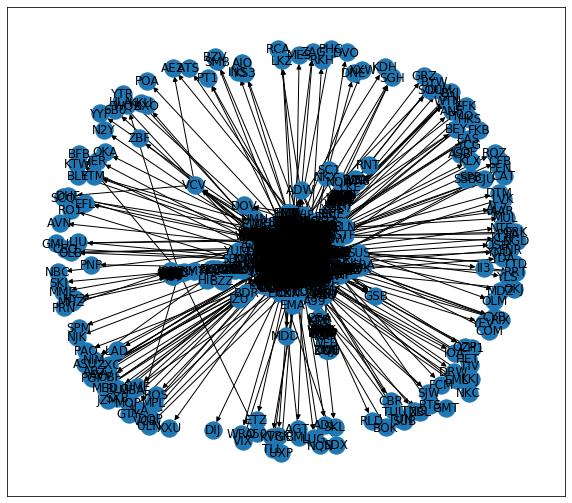

In [89]:
plt.figure(figsize = (10,9))
nx.draw_networkx(graph)
# plt.savefig("./images/map_0.png", format = "png", dpi = 300)
plt.show()

NameError: name 'airports' is not defined

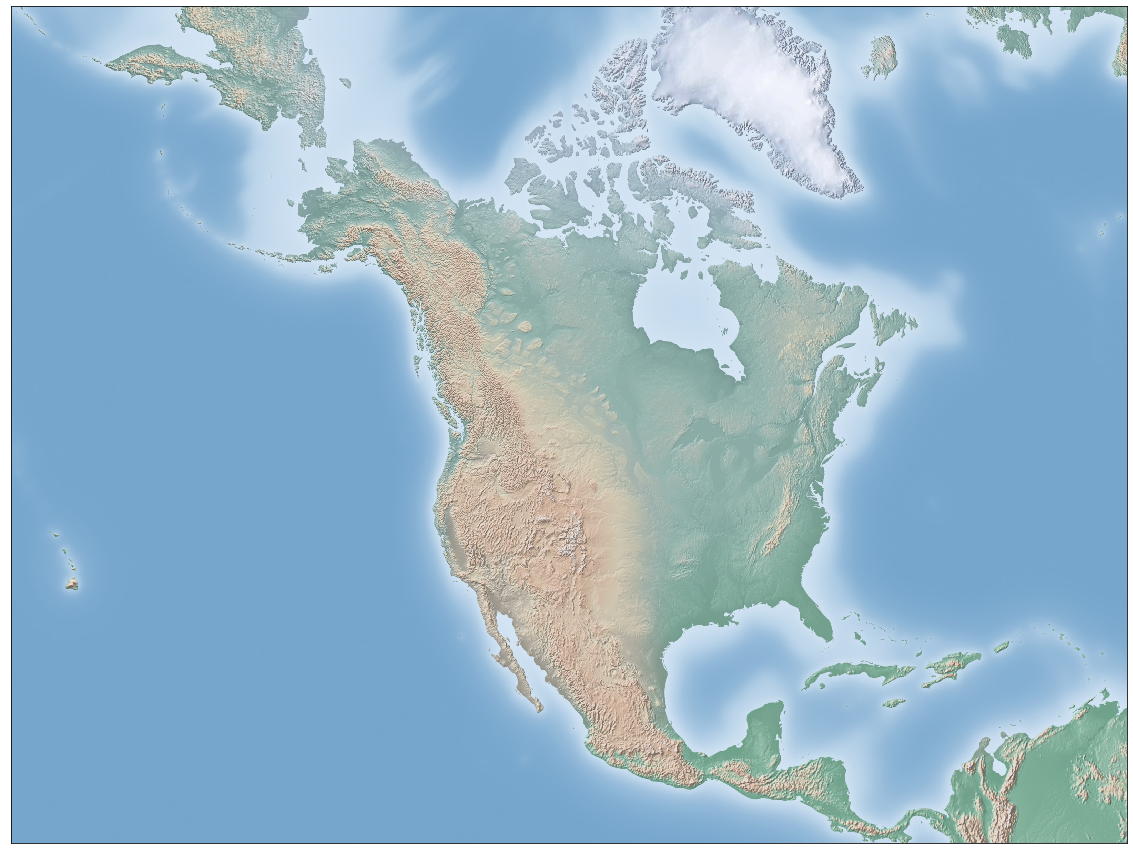

In [90]:
plt.figure(figsize = (20,20))
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.shadedrelief()

mx, my = m(airports[7].values, airports[6].values)
pos = {}
for count, elem in enumerate (airports[4]):
     pos[elem] = (mx[count], my[count])

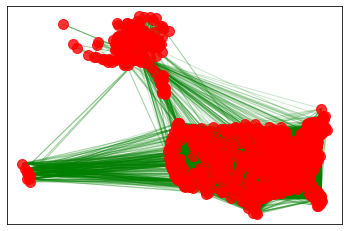

In [100]:
nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(),node_color = 'r', alpha = 0.8, node_size = 100)
nx.draw_networkx_edges(G = graph, pos = pos, edge_color='g', alpha=0.2, arrows = False)

C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


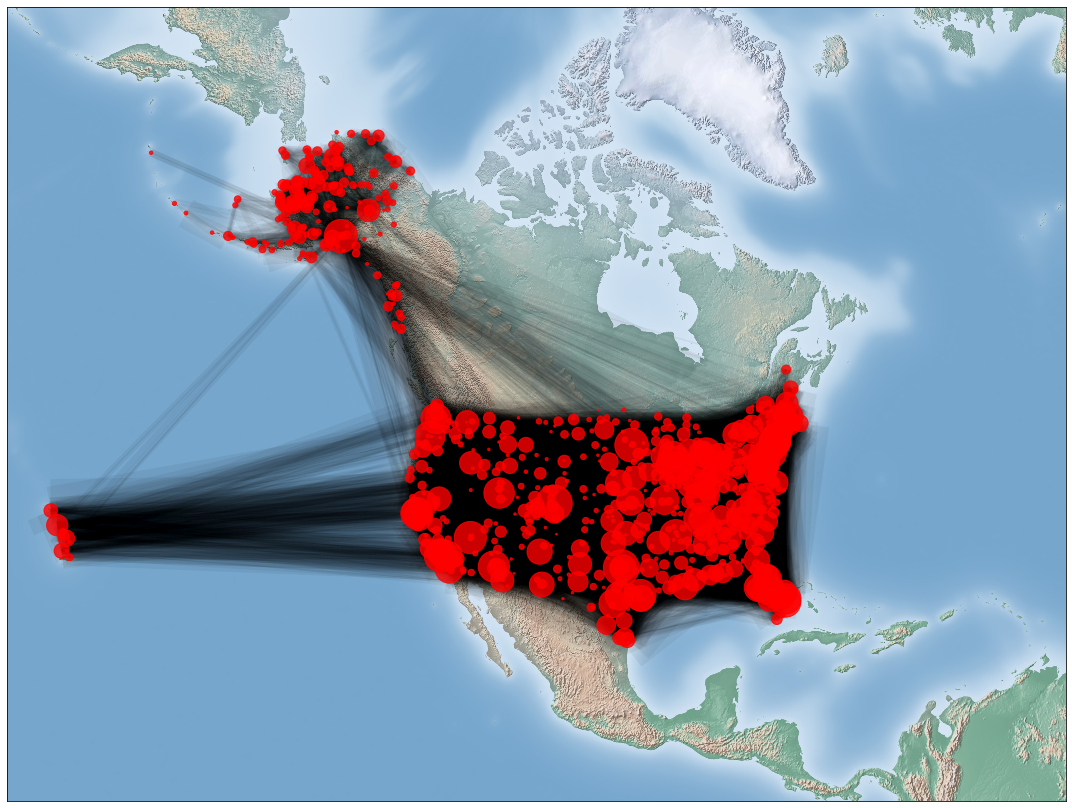

In [101]:
plt.figure(figsize=(15,20))
# m = Basemap(width=12000000,height=9000000,projection='lcc',
#             resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='l',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.,suppress_ticks=True)

# import long lat as m attribute
mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
pos = {}
for count, elem in enumerate (pos_data['IATA']):
    pos[elem] = (mx[count], my[count])
# draw nodes and edges and over aly on basemap
nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(), node_color = 'r', alpha = 0.8,
                       node_size = [counts['total_flight'][s]*3 for s in graph.nodes()])
nx.draw_networkx_edges(G = graph, pos = pos, edge_color='black', width = routes_data['counts']*0.75, 
                       alpha=0.05, arrows = False)
# m.drawcountries(linewidth = 2)
# m.drawstates(linewidth = 0.2)
# m.drawcoastlines(linewidth=3)
# # draw coastlines.
# # m.drawcoastlines()
# # draw a boundary around the map, fill the background.
# # this background will end up being the ocean color, since
# # the continents will be drawn on top.
# m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
# m.fillcontinents(color='yellow',lake_color='aqua',alpha=0.3)
m.shadedrelief()
plt.tight_layout()
plt.show()


In [70]:
# pos_data[pos_data["IATA"]=="HKB"]
# routes_us[routes_us["Dest Airport"]=="HKB"]
# routes_us[routes_us["Source Airport"]=="HKB"]
# routes_us = routes_us[routes_us["Dest Airport"] != "HKB"]
# routes_us = routes_us[routes_us["Source Airport"] != "HKB"]

Empty DataFrame
Columns: [Source Airport, Dest Airport, counts]
Index: []

C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


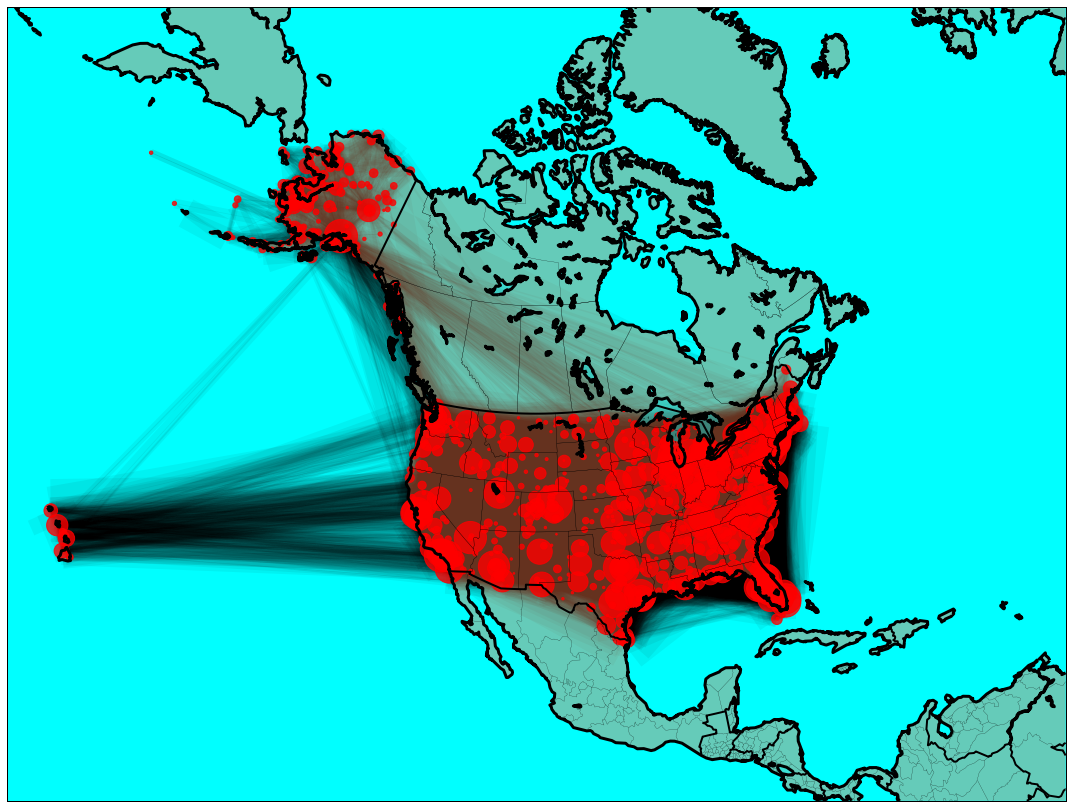

In [102]:
plt.figure(figsize=(15,20))
# m = Basemap(width=12000000,height=9000000,projection='lcc',
#             resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='l',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.,suppress_ticks=True)

# import long lat as m attribute
mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
pos = {}
for count, elem in enumerate (pos_data['IATA']):
    pos[elem] = (mx[count], my[count])
# draw nodes and edges and over aly on basemap
nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(), node_color = 'r', alpha = 0.8,
                       node_size = [counts['total_flight'][s]*3 for s in graph.nodes()])
nx.draw_networkx_edges(G = graph, pos = pos, edge_color='black', width = routes_data['counts']*0.75, 
                       alpha=0.05, arrows = False)
m.drawcountries(linewidth = 2)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
# # draw coastlines.
# # m.drawcoastlines()
# # draw a boundary around the map, fill the background.
# # this background will end up being the ocean color, since
# # the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua',alpha=0.4)
# m.shadedrelief()
plt.tight_layout()
plt.show()

C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


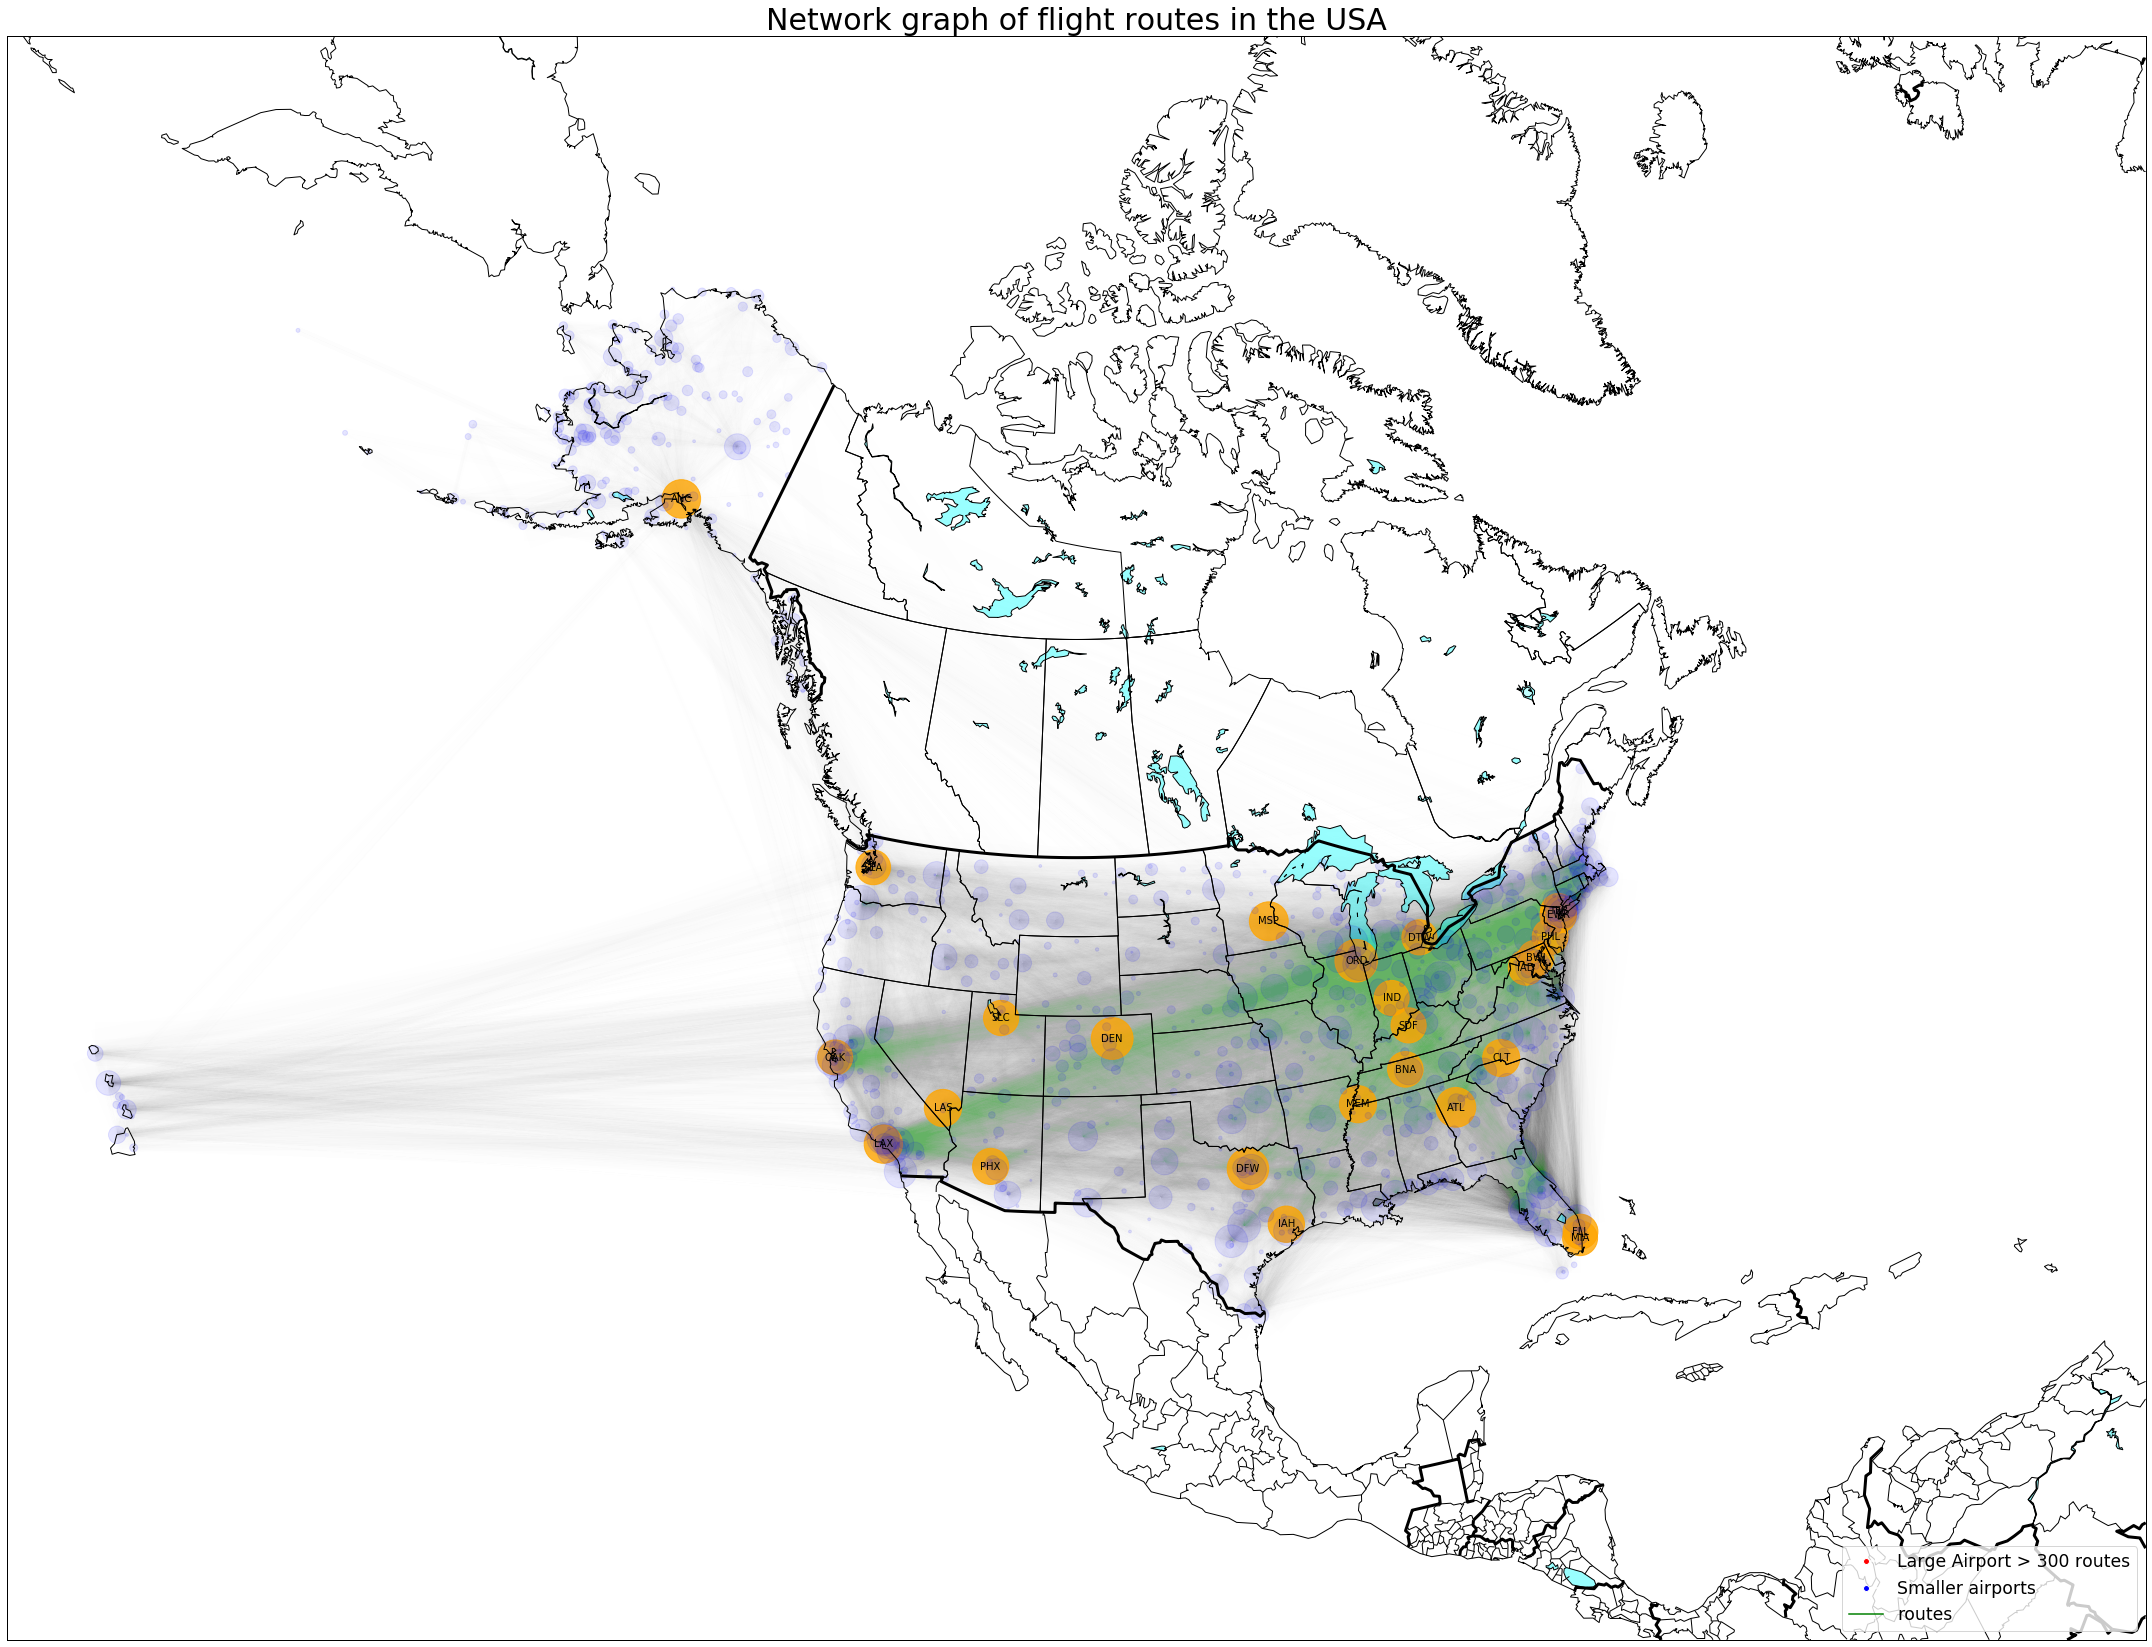

In [117]:
import matplotlib.lines as mlines
plt.figure(figsize=(30,30))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='l',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.,suppress_ticks=True)
# import long lat as m attribute
mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
pos = {}
for count, elem in enumerate (pos_data['IATA']):
    pos[elem] = (mx[count], my[count])
# draw nodes and edges and overly on basemap
nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] >= 300],
                       node_color = 'orange', alpha = 0.8,
                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] >= 300])

nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,
                        labels = {x:x for x in graph.nodes() if counts['total_flight'][x] >= 300})

nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] < 300],
                       node_color = 'b', alpha = 0.1,
                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] < 300])

nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g', width = routes_data['counts']*0.75, 
                       alpha=0.003, arrows = False)

m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 1)
m.drawcoastlines(linewidth=1)
# m.fillcontinents(alpha = 0.3)
line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue")
line3 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="green")
plt.legend((line1, line2, line3), ('Large Airport > 300 routes', 'Smaller airports', 'routes'),
           loc=4, fontsize = 'xx-large')
plt.title("Network graph of flight routes in the USA", fontsize = 30)
m.drawmapboundary(fill_color='white')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='white',lake_color='aqua',alpha=0.4)
#m.bluemarble()
plt.tight_layout()

C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\likhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


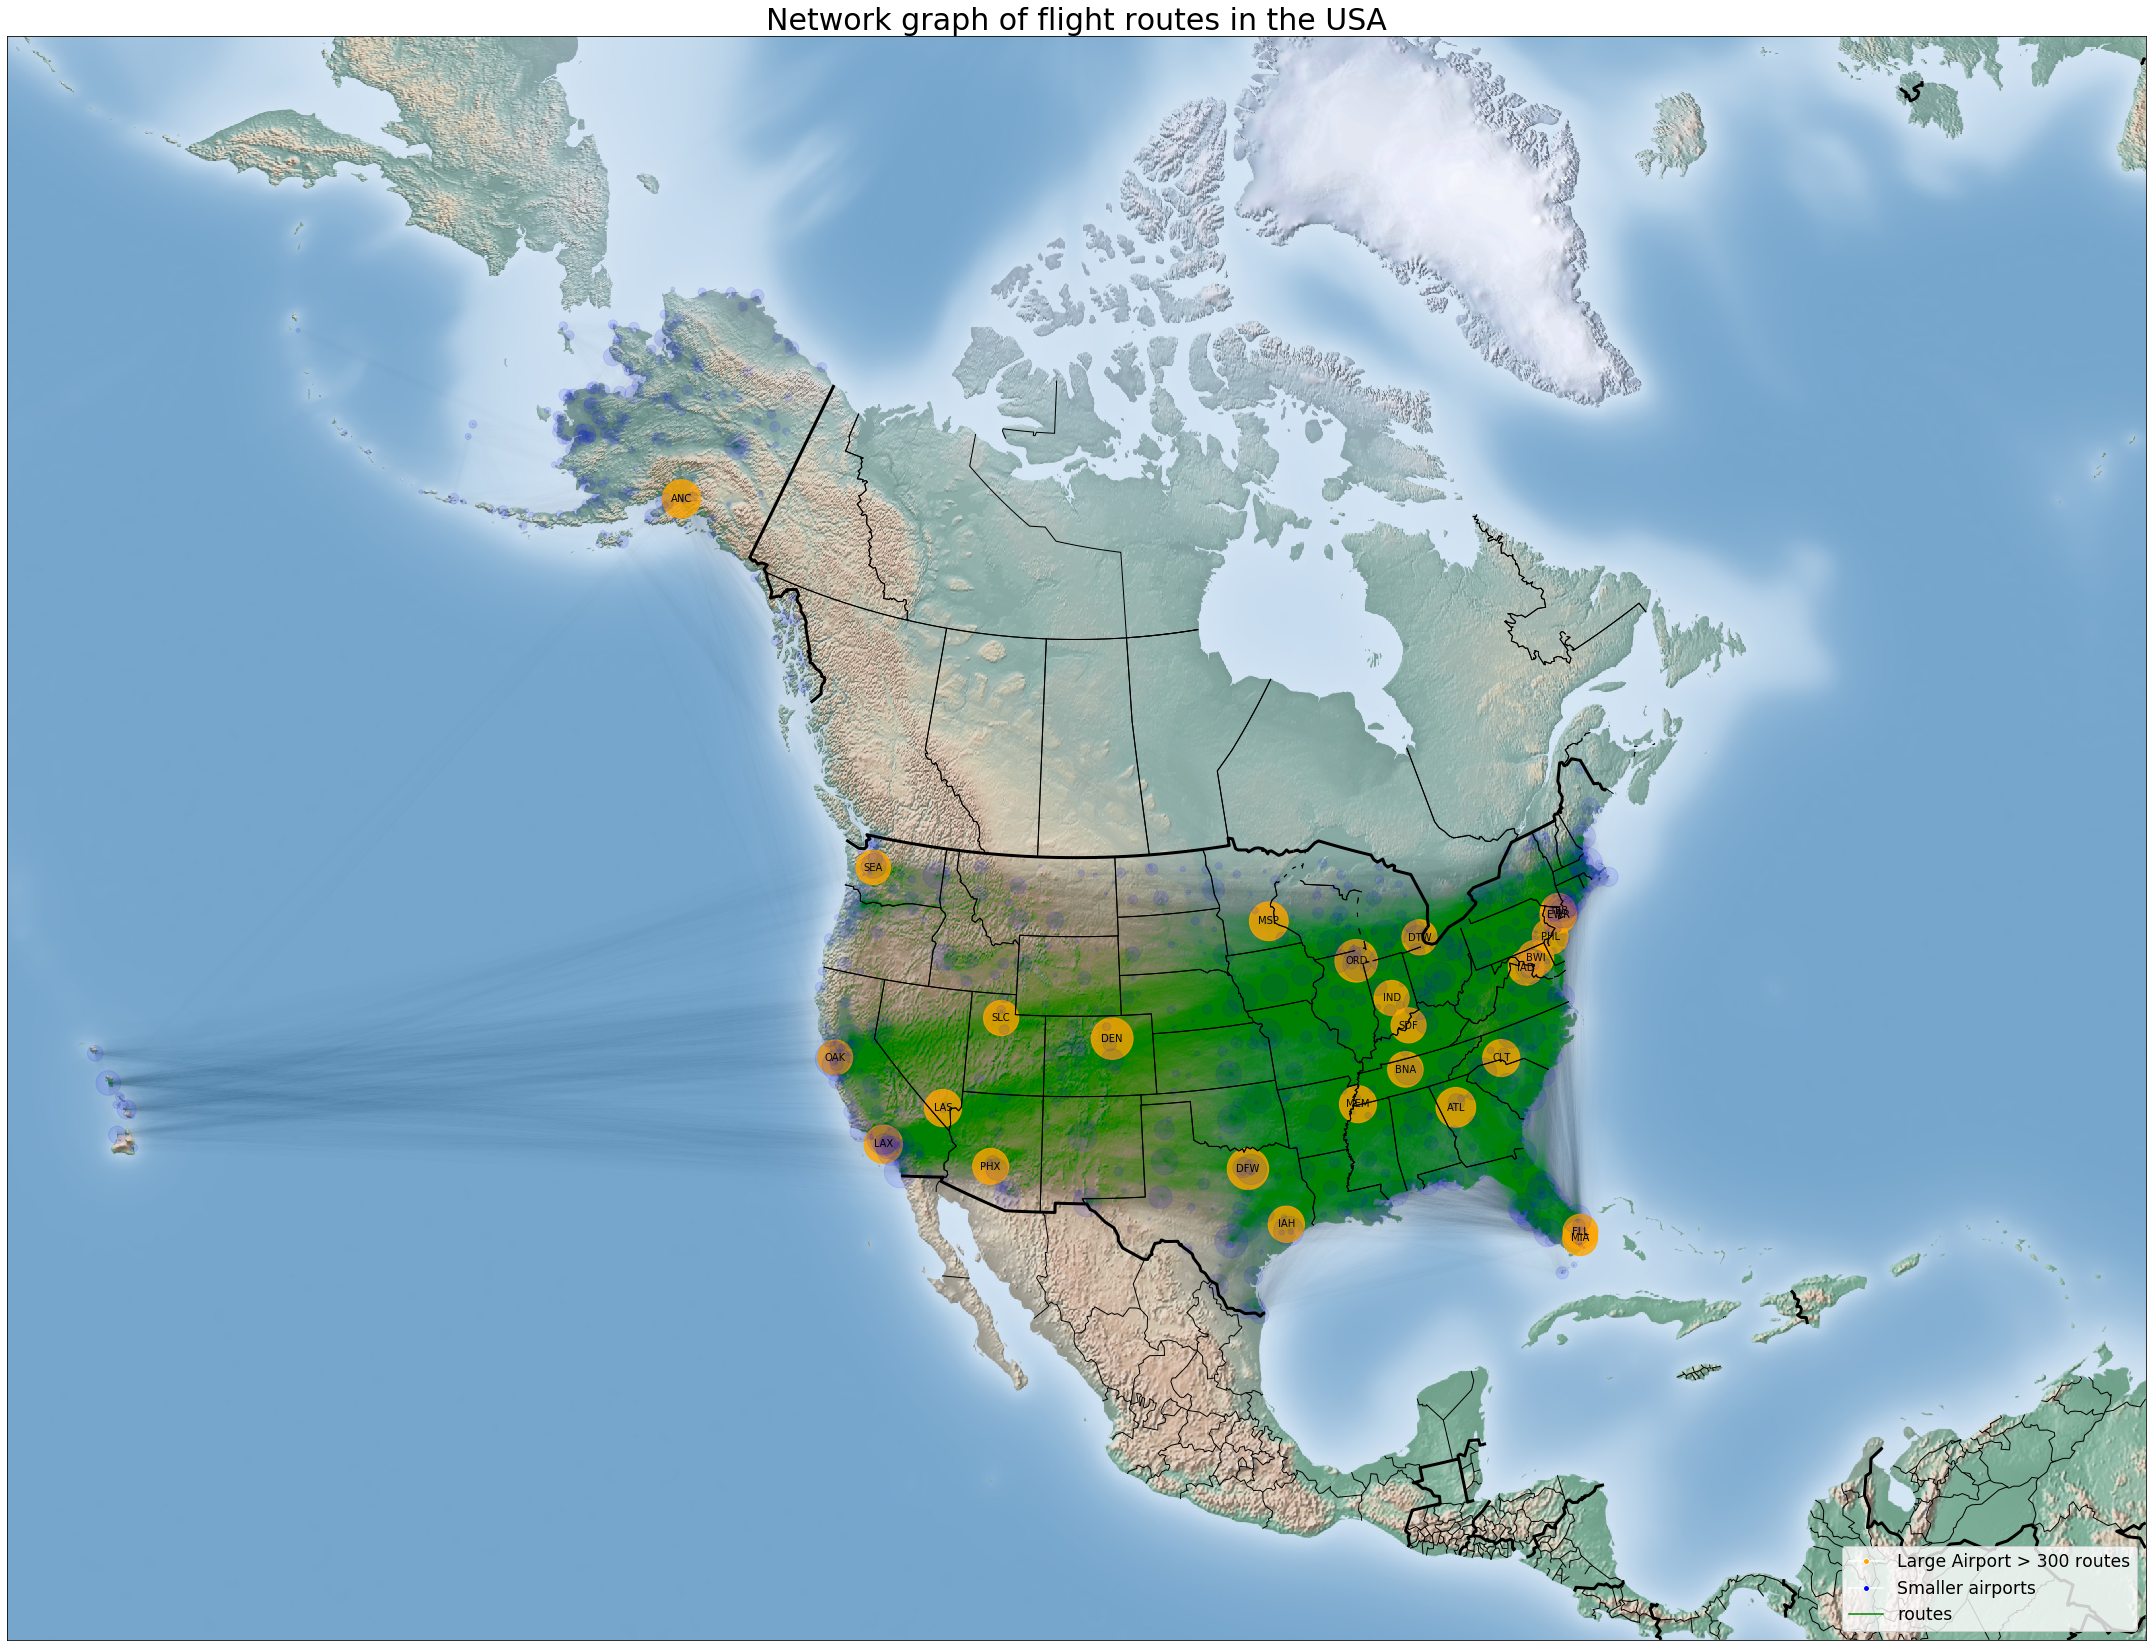

In [120]:
import matplotlib.lines as mlines
plt.figure(figsize=(30,30))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='l',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.,suppress_ticks=True)
# import long lat as m attribute
mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
pos = {}
for count, elem in enumerate (pos_data['IATA']):
    pos[elem] = (mx[count], my[count])
# draw nodes and edges and overly on basemap
nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] >= 300],
                       node_color = 'orange', alpha = 0.8,
                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] >= 300])

nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,
                        labels = {x:x for x in graph.nodes() if counts['total_flight'][x] >= 300})

nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] < 300],
                       node_color = 'b', alpha = 0.1,
                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] < 300])

nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g', width = routes_data['counts']*0.75, 
                       alpha=0.003, arrows = False)
m.shadedrelief()
m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 1)
# m.drawcoastlines(linewidth=1)
# m.fillcontinents(alpha = 0.3)
line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="orange")
line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="b")
line3 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="g")
plt.legend((line1, line2, line3), ('Large Airport > 300 routes', 'Smaller airports', 'routes'),
           loc=4, fontsize = 'xx-large')
plt.title("Network graph of flight routes in the USA", fontsize = 30)
# m.drawmapboundary(fill_color='white')
# fill continents, set lake color same as ocean color.
# m.fillcontinents(color='white',lake_color='aqua',alpha=0.4)
# m.shadedrelief()
#m.bluemarble()
plt.tight_layout()